# On détaille ici un programme python affichant les points expérimentaux des mesures de l'absorbance A en fonction de la concentration C

### Chaque partie de code est précédée d'un titre.
### Certaines parties de code sont à modifier par vous, cela est indiqué par la mention "A VOUS DE JOUER" dans le titre de la partie.

### ETAPE 0 : Initialisation des bibliothèques python nécessaires.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.close() #On ferme les fenêtres graphiques éventuellement ouvertes.

### ETAPE 1 : Entrée des valeurs expérimentales de l'absorbance A et de la concentration C.

### A VOUS DE JOUER : compléter les listes de valeurs d'absorbance A et de concentration C.

In [10]:
A = [] #liste des valeurs des absorbances
C = [] #liste des valeurs des concentrations

### ETAPE 2 : Construction de la droite qui modélisera la répartition des points (Loi de Beer-Lambert).

In [13]:
def modele(x, a, b): # Définition de la fonction de modélisation
    y = a * x + b
    return y

unpeu_x = (max(C) - min(C)) / 10
unpeu_y = (max(A) - min(A)) / 10

x_mod_min = 0 #Abscisse de début de la courbe modèle
x_mod_max = max(C) + unpeu_x #Abscisse de fin de la courbe modèle

X_modele = np.linspace(x_mod_min, x_mod_max, 100) #On génère les abscisses du modèle, unpeu permet d'obtenir une courbe qui dépasse à droite et à gauche

valeurs, covar = curve_fit(modele, C, A) # On calcule les meilleurs valeurs de a et b pour l'ajustement

y_mod_min = 0
y_mod_max = valeurs[0]*x_mod_max + valeurs[1]

Y_modele = modele(X_modele, valeurs[0], valeurs[1]) # On génère les ordonnées du modèle avec les valeurs de a et b adaptées

### ETAPE 3 : On définit les limites des valeurs minimales et maximales de la fenêtre graphique.

In [14]:
x_graph_min = 0 # abscisse minimale de la fenêtre graphique
x_graph_max = x_mod_max + unpeu_x # abscisse maximale de la fenêtre graphique

y_graph_min = 0 # ordonnée minimale de la fenêtre graphique
y_graph_max = y_mod_max + unpeu_y # ordonnée maximale de la fenêtre graphique

### ETAPE 4 : On trace le graphique A = f(C)

### A VOUS DE JOUER : donner un titre au graphique et un nom aux axes avec leurs unités.

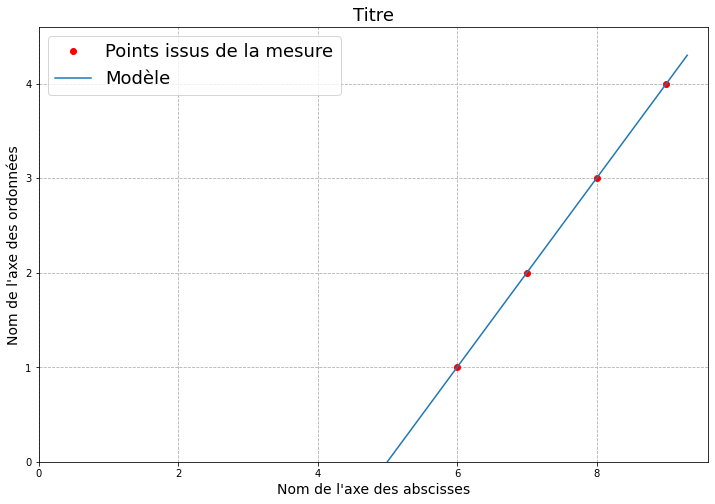

In [17]:
plt.figure(figsize=(12,8))
plt.title("Titre", size=18) # Affiche le titre du graphique
plt.ylabel("Nom de l'axe des ordonnées",size=14) # Affiche le nom de l’axe des ordonnées (vertical)
plt.xlabel("Nom de l'axe des abscisses", size=14) # Affiche le nom de l’axe des abscisses (horizontal)

plt.grid(linestyle='--') # Le cadrillage doit être affiché sous forme de tirets
plt.xlim(x_graph_min, x_graph_max) # On précise les limites en abscisses de la fenêtre graphique (horizontal)
plt.ylim(y_graph_min, y_graph_max)# On précise les limites en ordonnées de la fenêtre graphique (vertical)
plt.plot(C, A, 'o', color ='red', label = 'Points issus de la mesure') # Affiche les points expérimentaux
plt.plot(X_modele, Y_modele, label = 'Modèle') # Affiche le modèle mathématique
plt.legend(fontsize=18) # Affiche la légende du graphique
plt.show() # Affiche le graphique